In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [7]:
x.shape

(100, 2)

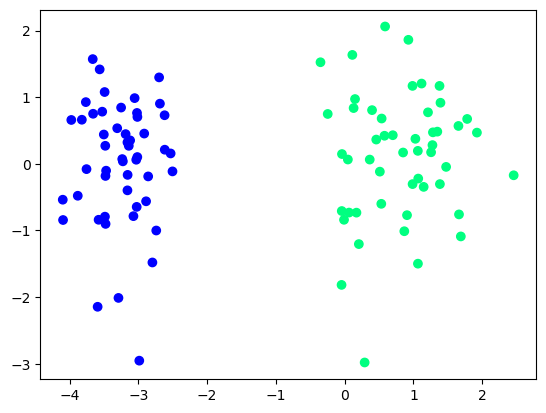

In [10]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')

In [12]:
logi = LogisticRegression(penalty=None,solver='sag')
logi.fit(x,y)

/home/janardhan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [13]:
logi.intercept_,logi.coef_

(array([5.77256828]), array([[4.79853648, 0.20948662]]))

In [31]:
m_logi = -logi.coef_[0][0]/logi.coef_[0][1]
b_logi = -logi.intercept_/logi.coef_[0][1]

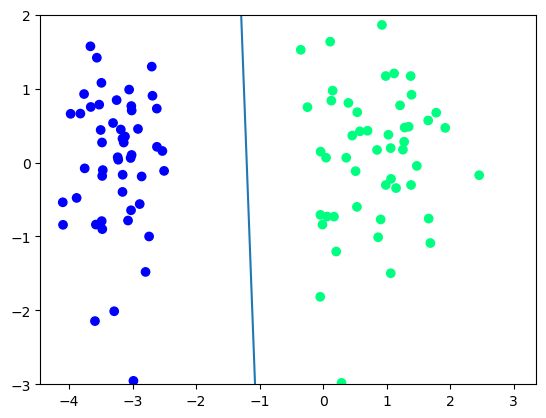

In [68]:
# plt.axis([x_min, x_max, y_min, y_max])
plt.ylim(-3,2)
x_test = np.linspace(-4,3,100)
y_pred = m_logi*x_test+b_logi
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.plot(x_test,y_pred)

In [69]:
def step(z):
    return 1 if z>0 else 0
def sigmod(z):
    return 1/(1+np.exp(-z))

In [107]:
def logistic_regression_gradient_descent(x,y):
    x=np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    epochs = 6000
    learning_rate = 0.1
    for i in range(epochs):
        y_hat = sigmod(np.dot(x,weights))
        weights = weights + learning_rate*(np.dot((y-y_hat),x)/x.shape[0])
    return weights[0],weights[1:]

In [108]:
def logistic_regression_step(x,y):
    x=np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    epochs = 1000
    learning_rate = 0.1
    for i in range(epochs):
        xi = np.random.randint(0,x.shape[0])
        y_hat = step(np.dot(x[xi],weights))
        weights = weights + learning_rate*(y[xi]-y_hat)*x[xi]
    return weights[0],weights[1:]

In [109]:
def logistic_regression_sigmod(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    epochs = 1000
    learning_rate = 0.1
    for i in range(epochs):
        xi = np.random.randint(0,x.shape[0])
        y_hat = sigmod(np.dot(x[xi],weights))
        weights = weights + learning_rate*(y[xi]-y_hat)*x[xi]
    return weights[0],weights[1:]

In [110]:
intercept_gd,coef_gd = logistic_regression_gradient_descent(x,y)
m_gd,b_gd = -(coef_gd[0]/coef_gd[1]),-(intercept_gd/coef_gd[1])

In [111]:
intercept_sigmod,coef_sigmod = logistic_regression_sigmod(x,y)
m_sigmod,b_sigmod = -(coef_sigmod[0]/coef_sigmod[1]),-(intercept_sigmod/coef_sigmod[1])

In [112]:
intercept_step,coef_step = logistic_regression_step(x,y)
m_step,b_step = -(coef_step[0]/coef_step[1]),-(intercept_step/coef_step[1])

(-3.0, 2.0)

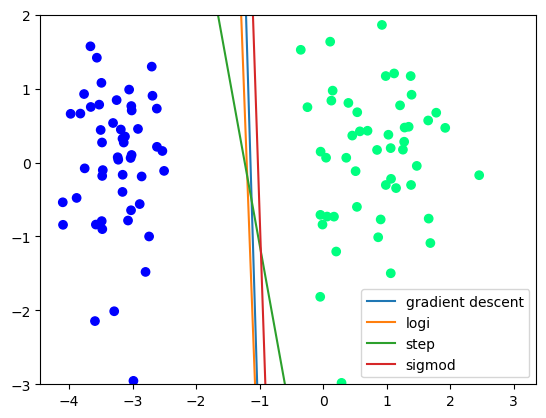

In [113]:
y_pred_gd = m_gd*x_test+b_gd
y_pred_step = m_step*x_test+b_step
y_pred_sigmod = m_sigmod*x_test+b_sigmod
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.plot(x_test,y_pred_gd,label='gradient descent')
plt.plot(x_test,y_pred,label='logi')
plt.plot(x_test,y_pred_step,label='step')
plt.plot(x_test,y_pred_sigmod,label='sigmod')
plt.legend()
plt.ylim(-3,2)